In [ ]:
!pip install fredapi



In [ ]:
from fredapi import Fred

# Replace 'your_api_key' with your actual FRED API key
fred = Fred(api_key='0ecabe2a48130d6891c15fbc1b599d1c')

# Example: Downloading GDP data
NG = fred.get_series('PNGASEUUSDM')

# Print the first 5 data points
print(NG.head())
print(NG.tail())

1985-01-01   NaN
1985-02-01   NaN
1985-03-01   NaN
1985-04-01   NaN
1985-05-01   NaN
dtype: float64
2023-10-01    13.388843
2023-11-01    13.714316
2023-12-01    11.296291
2024-01-01     9.531191
2024-02-01     8.098181
dtype: float64


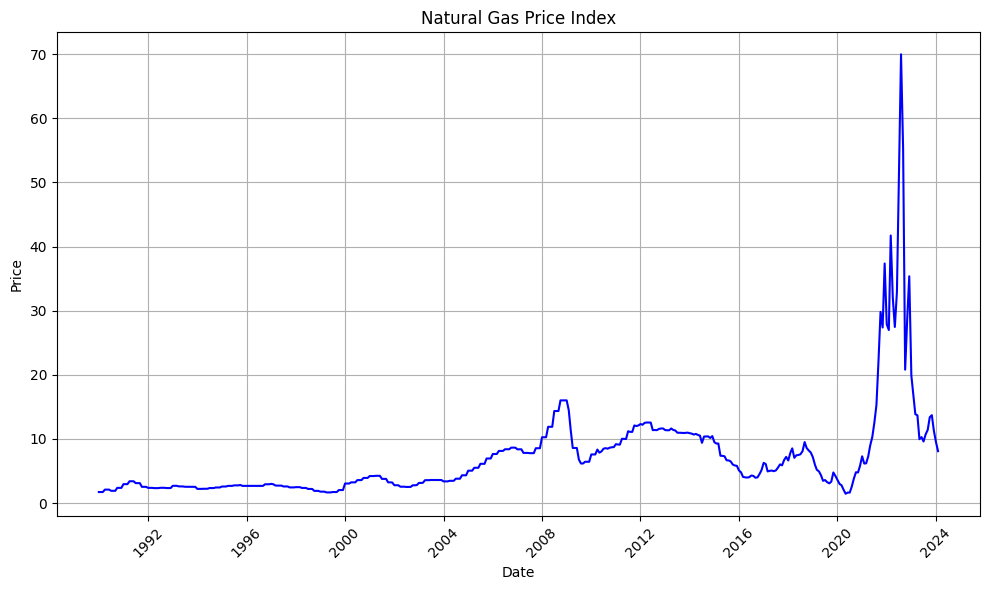

In [ ]:
import matplotlib.pyplot as plt

# Plotting the price curve
plt.figure(figsize=(10, 6))
plt.plot(NG.index, NG.values, color='blue', linestyle='-')
plt.title('Natural Gas Price Index')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files
import pandas as pd

# Upload CSV file
uploaded = files.upload()

# Read uploaded CSV file
for file_name in uploaded.keys():
    data = pd.read_csv(file_name)
    print("CSV file uploaded and loaded successfully.")

In [ ]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Sort the DataFrame by 'Date' column in ascending order
data.sort_values(by='Date', inplace=True)

# Reset index after sorting
data.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
print(data)


           Date   Price    Open    High     Low    Vol. Change %
0    2010-03-15  11.600  11.600  11.600  11.600     NaN   -7.20%
1    2010-03-16  11.410  11.800  11.875  11.650   0.15K   -1.64%
2    2010-03-17  11.310  11.300  11.300  11.200   0.12K   -0.88%
3    2010-03-18  11.090  11.250  11.250  11.250   0.03K   -1.95%
4    2010-03-19  11.120  11.050  11.100  11.050   0.06K    0.27%
...         ...     ...     ...     ...     ...     ...      ...
3598 2024-03-28  27.340  27.435  28.150  27.120  64.74K   -1.25%
3599 2024-04-02  26.203  27.250  27.800  26.045  81.70K   -4.16%
3600 2024-04-03  25.563  26.170  26.170  25.180  87.54K   -2.44%
3601 2024-04-04  26.206  25.785  26.580  25.480  80.27K    2.52%
3602 2024-04-05  26.250  26.320  26.775  26.010  25.26K    0.17%

[3603 rows x 7 columns]


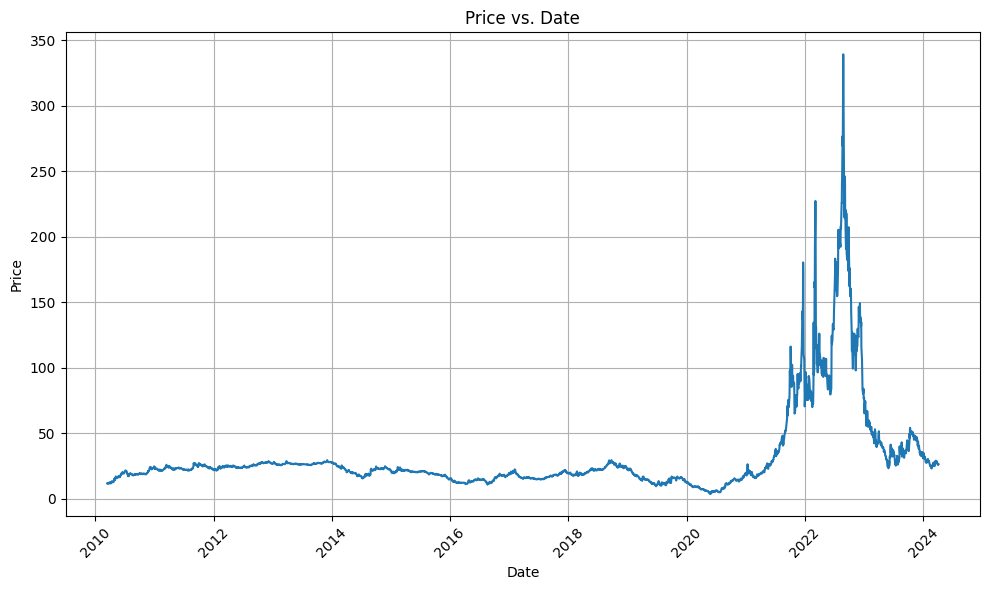

In [ ]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Price'], linestyle='-')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price vs. Date')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Adjust DataFrame to include only 'Date', 'Price', and 'Change%'
data_adjusted = data[['Date', 'Price', 'Change %']]

# Print the adjusted DataFrame
print(data_adjusted)

           Date   Price Change %
0    2010-03-15  11.600   -7.20%
1    2010-03-16  11.410   -1.64%
2    2010-03-17  11.310   -0.88%
3    2010-03-18  11.090   -1.95%
4    2010-03-19  11.120    0.27%
...         ...     ...      ...
3598 2024-03-28  27.340   -1.25%
3599 2024-04-02  26.203   -4.16%
3600 2024-04-03  25.563   -2.44%
3601 2024-04-04  26.206    2.52%
3602 2024-04-05  26.250    0.17%

[3603 rows x 3 columns]


In [ ]:
# Calculate summary statistics
price_summary = data_adjusted['Price'].describe()

# Print the summary statistics
print("Summary Statistics of Price:")
print(price_summary)

Summary Statistics of Price:
count    3603.000000
mean       31.177888
std        34.433882
min         3.509000
25%        16.770500
50%        21.890000
75%        26.600000
max       339.196000
Name: Price, dtype: float64


<ipython-input-19-f688aafe3bc7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_adjusted['Change %'] = data_adjusted['Change %'].str.rstrip('%').astype(float)


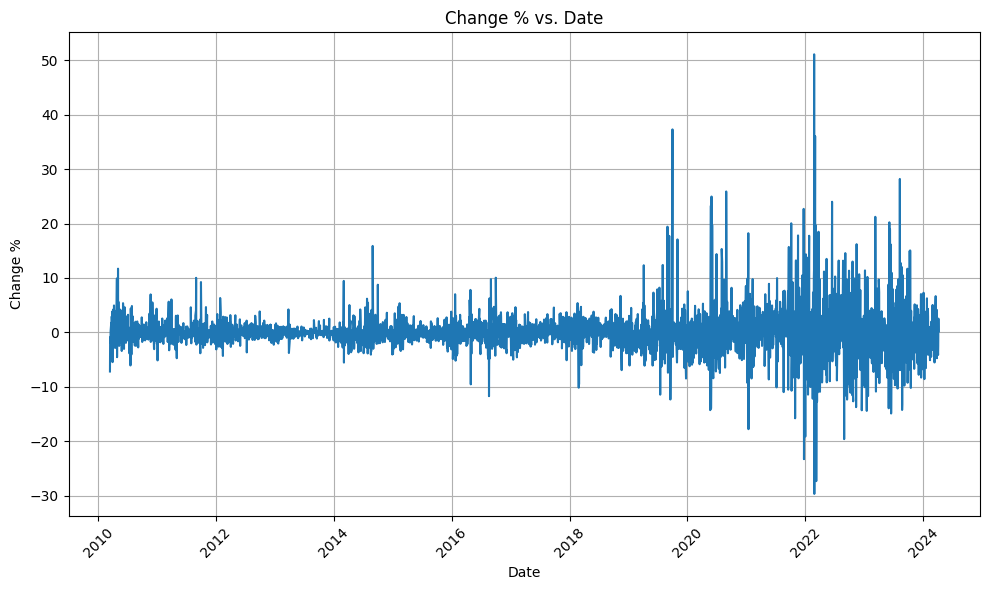

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Change%' to numeric (remove '%' sign)
data_adjusted['Change %'] = data_adjusted['Change %'].str.rstrip('%').astype(float)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(data_adjusted['Date'], data_adjusted['Change %'], linestyle='-')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Change %')
plt.title('Change % vs. Date')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate summary statistics
change_summary = data_adjusted['Change %'].describe()

# Print the summary statistics
print("Summary Statistics of Change %:")
print(change_summary)

Summary Statistics of Change %:
count    3603.000000
mean        0.098782
std         4.006414
min       -29.700000
25%        -1.360000
50%        -0.050000
75%         1.330000
max        51.100000
Name: Change %, dtype: float64


<ipython-input-29-19b43f0fcc64>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_adjusted['Change %'] = data_adjusted['Change %'].astype(str).apply(lambda x: float(x.strip('%')))


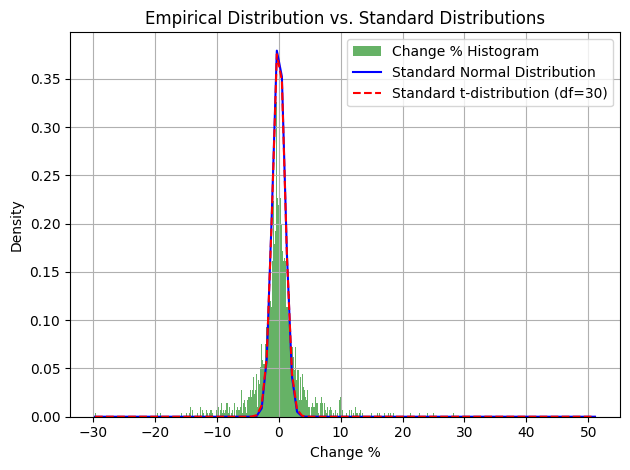

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, t

# Convert 'Change %' column to string, remove '%' sign, and convert to numeric
data_adjusted['Change %'] = data_adjusted['Change %'].astype(str).apply(lambda x: float(x.strip('%')))

# Plot the histogram of 'Change %' column
plt.hist(data_adjusted['Change %'], bins=1000, density=True, alpha=0.6, color='g', label='Change % Histogram')

# Generate data points for the standard normal distribution
x = np.linspace(data_adjusted['Change %'].min(), data_adjusted['Change %'].max(), 100)
standard_normal = norm.pdf(x, 0, 1)

# Generate data points for the standard t-distribution (with degrees of freedom = 30)
df = 30
standard_t = t.pdf(x, df)

# Plot the standard normal distribution
plt.plot(x, standard_normal, 'b-', label='Standard Normal Distribution')

# Plot the standard t-distribution
plt.plot(x, standard_t, 'r--', label=f'Standard t-distribution (df={df})')

# Set labels and title
plt.xlabel('Change %')
plt.ylabel('Density')
plt.title('Empirical Distribution vs. Standard Distributions')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-36-4e0bbab4e4a2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_adjusted['Change %'] = data_adjusted['Change %'].astype(str).apply(lambda x: float(x.strip('%')))


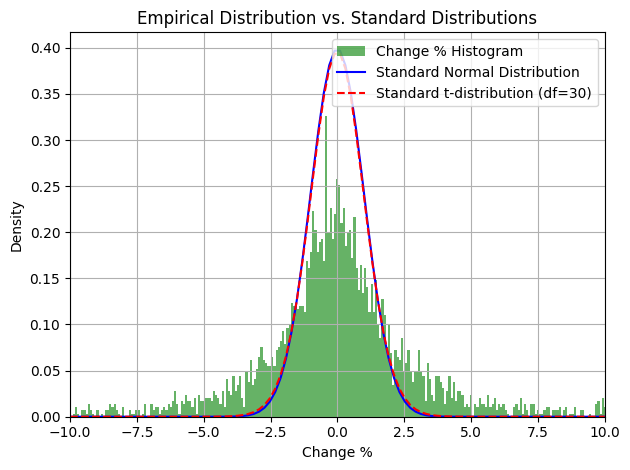

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, t

# Convert 'Change %' column to string, remove '%' sign, and convert to numeric
data_adjusted['Change %'] = data_adjusted['Change %'].astype(str).apply(lambda x: float(x.strip('%')))

# Plot the histogram of 'Change %' column
plt.hist(data_adjusted['Change %'], bins=1000, density=True, alpha=0.6, color='g', label='Change % Histogram')

# Generate data points for the standard normal distribution within the range [-10, 10]
x_normal = np.linspace(-10, 10, 100)
standard_normal = norm.pdf(x_normal, 0, 1)

# Plot the standard normal distribution
plt.plot(x_normal, standard_normal, 'b-', label='Standard Normal Distribution')

# Generate data points for the standard t-distribution (with degrees of freedom = 30) within the range [-10, 10]
standard_t = t.pdf(x_normal, 30)

# Plot the standard t-distribution
plt.plot(x_normal, standard_t, 'r--', label='Standard t-distribution (df=30)')

# Set x-axis limit
plt.xlim(-10, 10)

# Set labels and title
plt.xlabel('Change %')
plt.ylabel('Density')
plt.title('Empirical Distribution vs. Standard Distributions')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from google.colab import files  # Importing files module for Google Colab

# Upload CSV file
uploaded = files.upload()

# Read uploaded CSV file with semicolon delimiter
for file_name in uploaded.keys():
    storage = pd.read_csv(file_name, delimiter=';')
    print("CSV file uploaded and loaded successfully.")

# Print the content of the CSV file
print(storage)

Saving StorageData_GIE_2011-01-01_2024-04-07.csv to StorageData_GIE_2011-01-01_2024-04-07 (1).csv
CSV file uploaded and loaded successfully.
     Status Gas Day Start  Gas in storage (TWh)  Full (%)  Trend (%)  \
0         E    2024-04-06              676.4762     59.90       0.24   
1         E    2024-04-05              673.7138     59.66       0.16   
2         E    2024-04-04              671.9065     59.49       0.04   
3         C    2024-04-03              671.4747     59.46       0.05   
4         C    2024-04-02              670.8705     59.42       0.14   
...     ...           ...                   ...       ...        ...   
4840      C    2011-01-05              428.0276     69.32      -0.58   
4841      C    2011-01-04              431.5952     69.89      -0.60   
4842      C    2011-01-03              435.3212     70.50      -0.51   
4843      C    2011-01-02              438.4398     71.00      -0.32   
4844      C    2011-01-01              440.3870     71.32       0.0

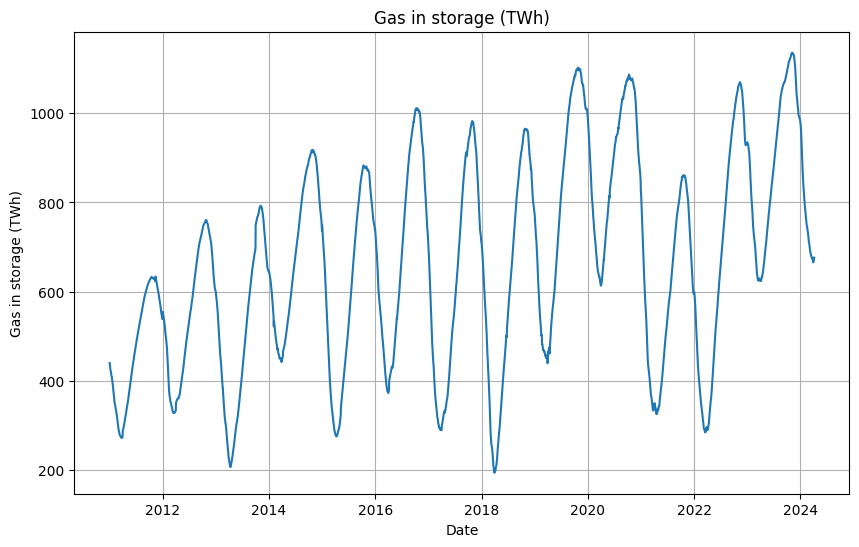

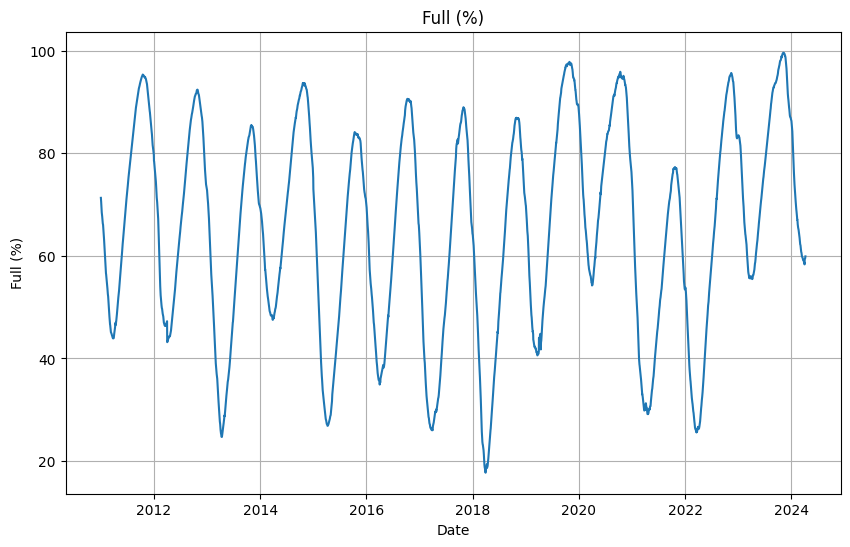

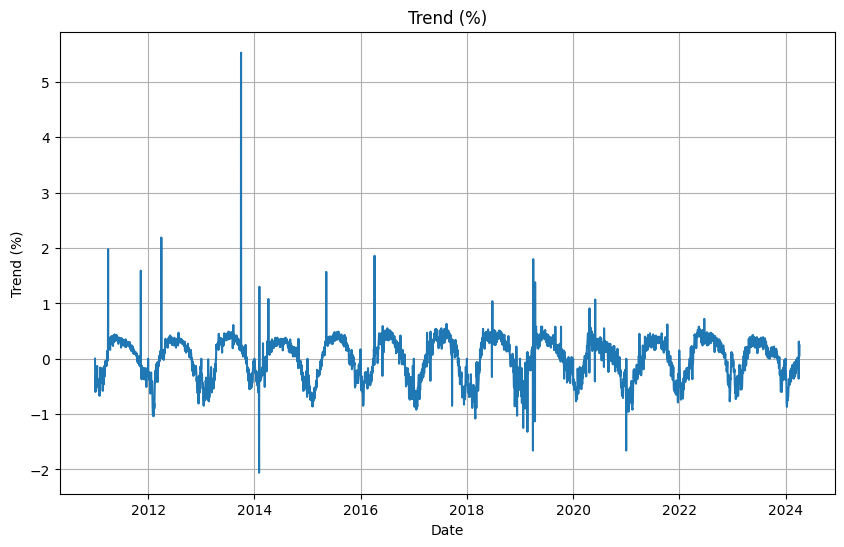

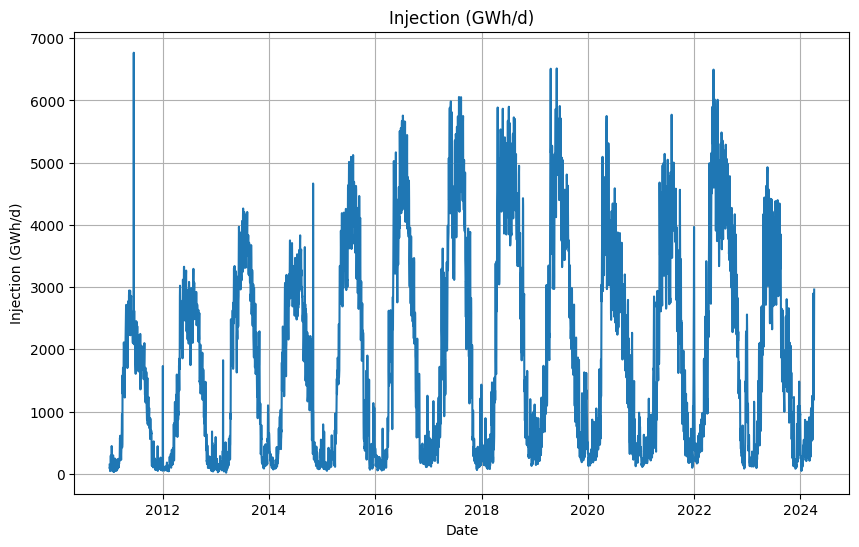

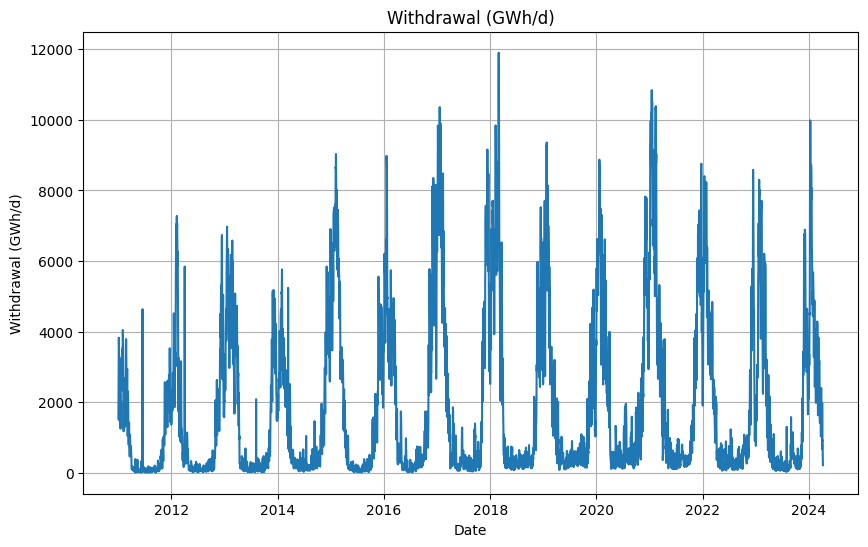

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming storage DataFrame already contains the data from the CSV file

# Convert 'Gas Day Start' column to datetime format
storage['Gas Day Start'] = pd.to_datetime(storage['Gas Day Start'])

# Sort DataFrame by the 'Gas Day Start' column in ascending order
storage_sorted = storage.sort_values(by='Gas Day Start')

# Plotting each column separately
columns_to_plot = ["Gas in storage (TWh)", "Full (%)", "Trend (%)", "Injection (GWh/d)", "Withdrawal (GWh/d)"]
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(storage_sorted['Gas Day Start'], storage_sorted[column])
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()
